# Foundation Visualization

### Prepping data for analysis

In [52]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [53]:
# Read all the CSV files in the directory
data_dir = '../data'
all_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]
df_list = [pd.read_csv(f) for f in all_files]
data = pd.concat(df_list, ignore_index=True)
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year_month
0,2004-08-04,0:00:00,1.4,1020.0,88.0,4.8,752.0,95.0,1074.0,97.0,1398.0,839.0,9.3,75.0,0.8799,2004-08
1,2004-08-04,1:00:00,1.5,1051.0,95.0,5.7,798.0,84.0,1016.0,89.0,1455.0,876.0,9.0,76.7,0.8825,2004-08
2,2004-08-04,2:00:00,1.1,965.0,83.0,4.1,716.0,56.0,1087.0,72.0,1383.0,827.0,8.2,79.6,0.8672,2004-08
3,2004-08-04,3:00:00,0.8,890.0,63.0,3.3,672.0,NaN,1183.0,NaN,1338.0,781.0,7.6,80.6,0.8437,2004-08
4,2004-08-04,4:00:00,NaN,823.0,38.0,1.8,568.0,43.0,1366.0,57.0,1263.0,699.0,8.3,75.6,0.8302,2004-08


In [54]:
# Handle NaN values
data.fillna(data.mean(), inplace=True)

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_18694/3925771505.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


### Temporal Analysis

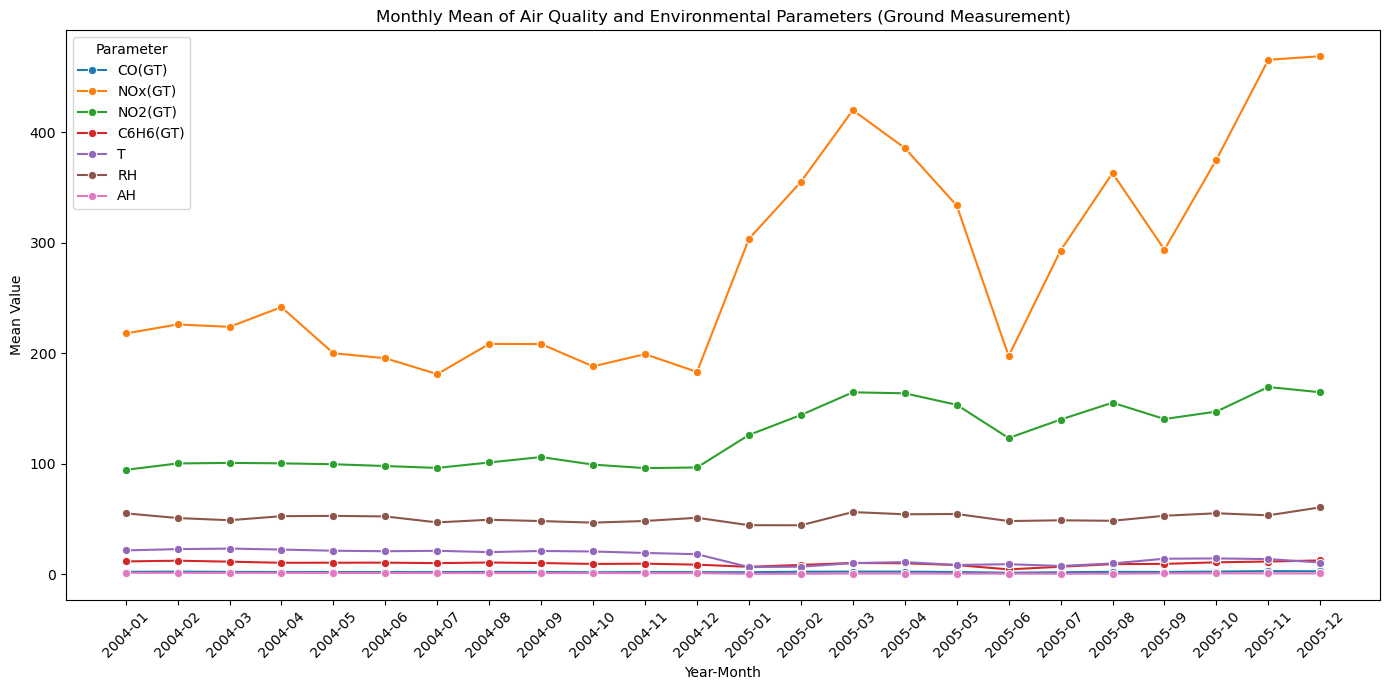

In [55]:
# Temporal Analysis (Ground Measurement) -- Month Yearly Trends

# Select columns to visualize
cols_to_plot = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

# Group by year_month and calculate mean for each parameter
monthly_means = data.groupby('year_month')[cols_to_plot].mean().reset_index()

# Melt the dataframe for seaborn
monthly_means_melted = monthly_means.melt(id_vars='year_month', value_vars=cols_to_plot, var_name='Parameter', value_name='Mean Value')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_means_melted, x='year_month', y='Mean Value', hue='Parameter', marker='o')
plt.title('Monthly Mean of Air Quality and Environmental Parameters (Ground Measurement)')
plt.xlabel('Year-Month')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Parameter', loc='best')
plt.tight_layout()
plt.show()

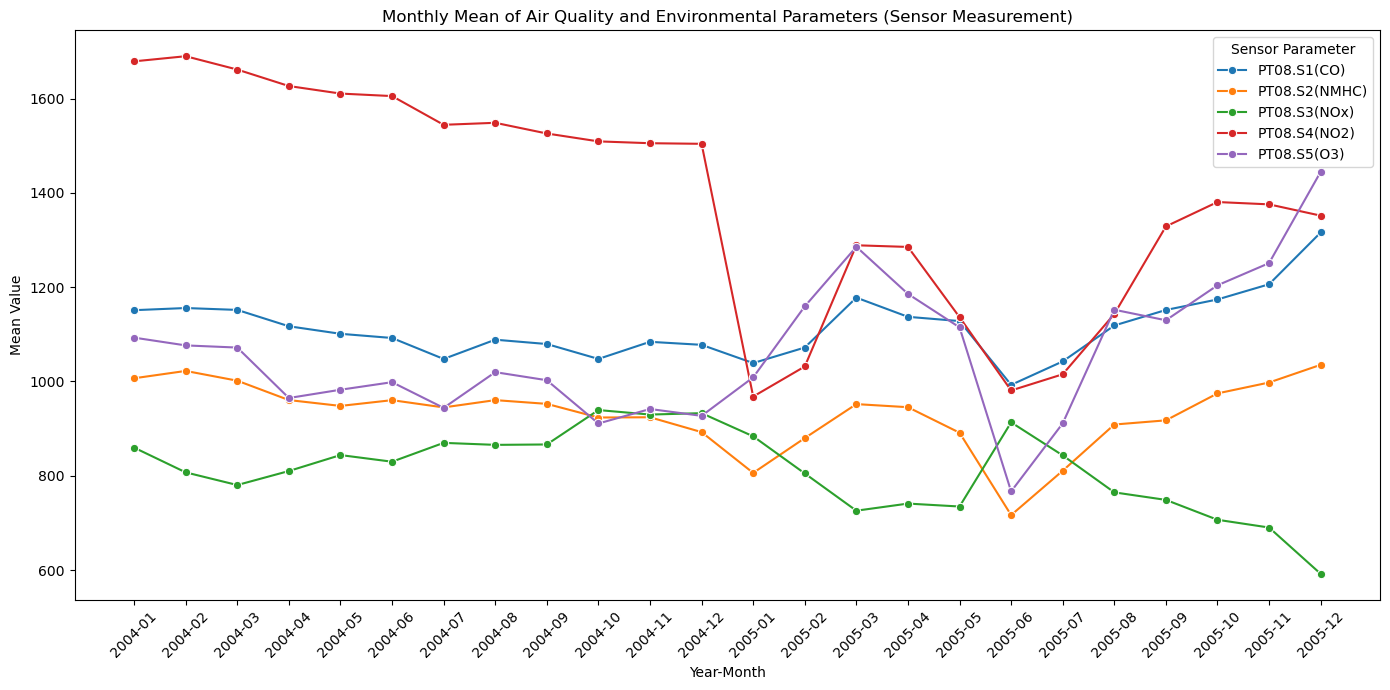

In [56]:
# Temporal Analysis (Sensor Measurement)  -- Month Yearly Trends

# Select columns to visualize
sensor_cols = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# Group by year_month and calculate mean for each parameter
sensor_monthly_means = data.groupby('year_month')[sensor_cols].mean().reset_index()

# Melt the dataframe for seaborn
sensor_monthly_means_melted = sensor_monthly_means.melt(id_vars='year_month', value_vars=sensor_cols, var_name='Sensor Parameter', value_name='Mean Value')

plt.figure(figsize=(14, 7))
sns.lineplot(data=sensor_monthly_means_melted, x='year_month', y='Mean Value', hue='Sensor Parameter', marker='o')
plt.title('Monthly Mean of Air Quality and Environmental Parameters (Sensor Measurement)')
plt.xlabel('Year-Month')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Sensor Parameter', loc='best')
plt.tight_layout()
plt.show()

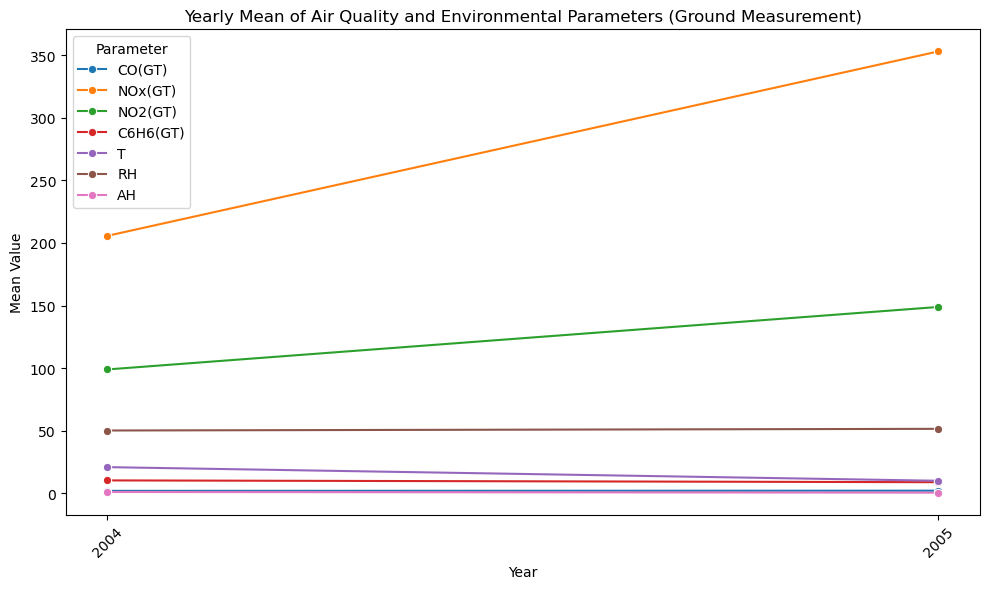

In [57]:
# Temporal Analysis (Ground Measurement) -- Yearly Trends
# Extract year from year_month
data['year'] = data['year_month'].str[:4]
yearly_means = data.groupby('year')[cols_to_plot].mean().reset_index()

yearly_means_melted = yearly_means.melt(id_vars='year', value_vars=cols_to_plot, var_name='Parameter', value_name='Mean Value')

# Plotting yearly trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_means_melted, x='year', y='Mean Value', hue='Parameter', marker='o')
plt.title('Yearly Mean of Air Quality and Environmental Parameters (Ground Measurement)')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Parameter', loc='best')
plt.tight_layout()
plt.show()

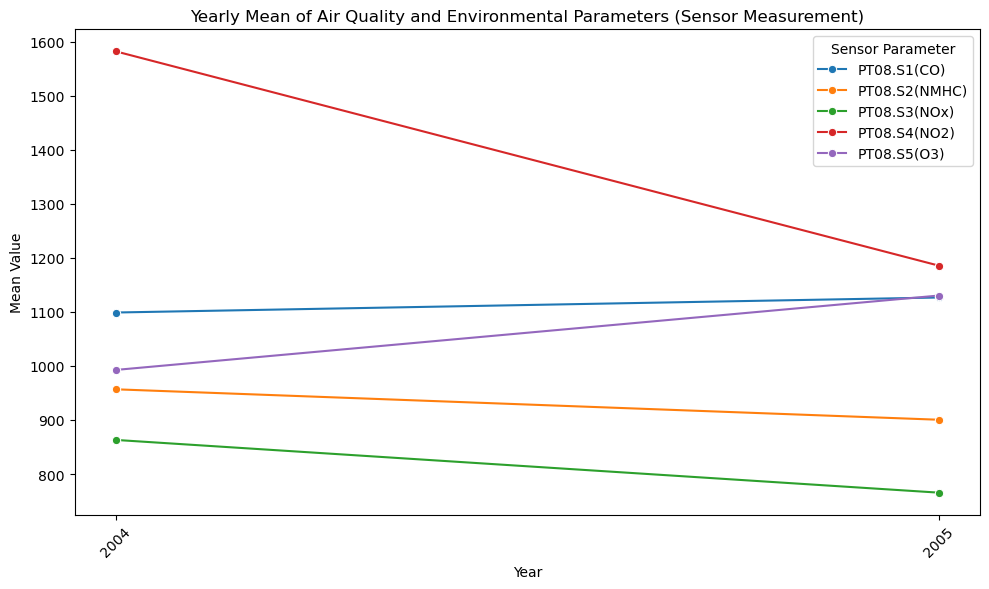

In [58]:
# Temporal Analysis (Sensor Measurement) -- Yearly Trends
sensor_yearly_means = data.groupby('year')[sensor_cols].mean().reset_index()
sensor_yearly_means_melted = sensor_yearly_means.melt(id_vars='year', value_vars=sensor_cols, var_name='Sensor Parameter', value_name='Mean Value')

# Plotting yearly trends for sensor measurements
plt.figure(figsize=(10, 6))
sns.lineplot(data=sensor_yearly_means_melted, x='year', y='Mean Value', hue='Sensor Parameter', marker='o')
plt.title('Yearly Mean of Air Quality and Environmental Parameters (Sensor Measurement)')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Sensor Parameter', loc='best')
plt.tight_layout()
plt.show()

### Cyclic Trends

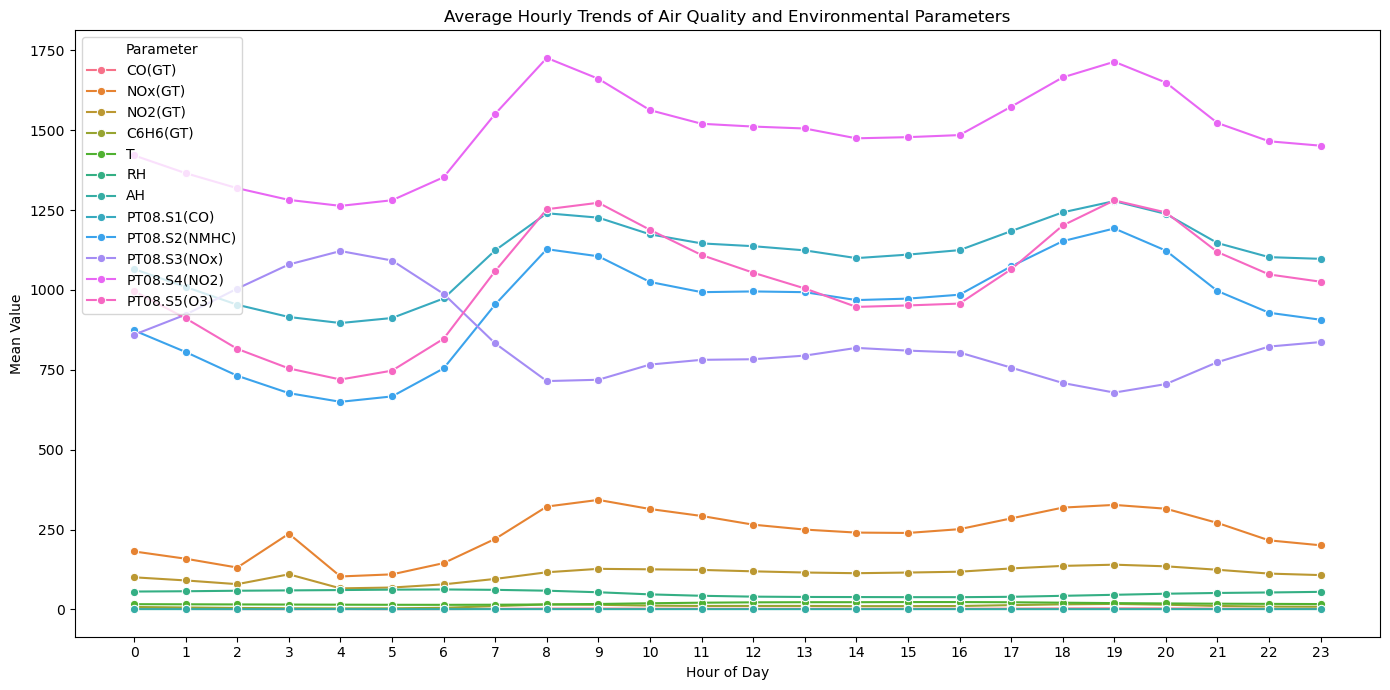

In [59]:
# Daily Cyclic Trends
# Average per hour across days

data['Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour

hourly_means = data.groupby('Hour')[cols_to_plot + sensor_cols].mean().reset_index()
hourly_means_melted = hourly_means.melt(id_vars='Hour', value_vars=cols_to_plot + sensor_cols, var_name='Parameter', value_name='Mean Value')

plt.figure(figsize=(14, 7))
sns.lineplot(data=hourly_means_melted, x='Hour', y='Mean Value', hue='Parameter', marker='o')
plt.title('Average Hourly Trends of Air Quality and Environmental Parameters')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Value')
plt.xticks(range(0, 24))
plt.legend(title='Parameter', loc='best')
plt.tight_layout()
plt.show()

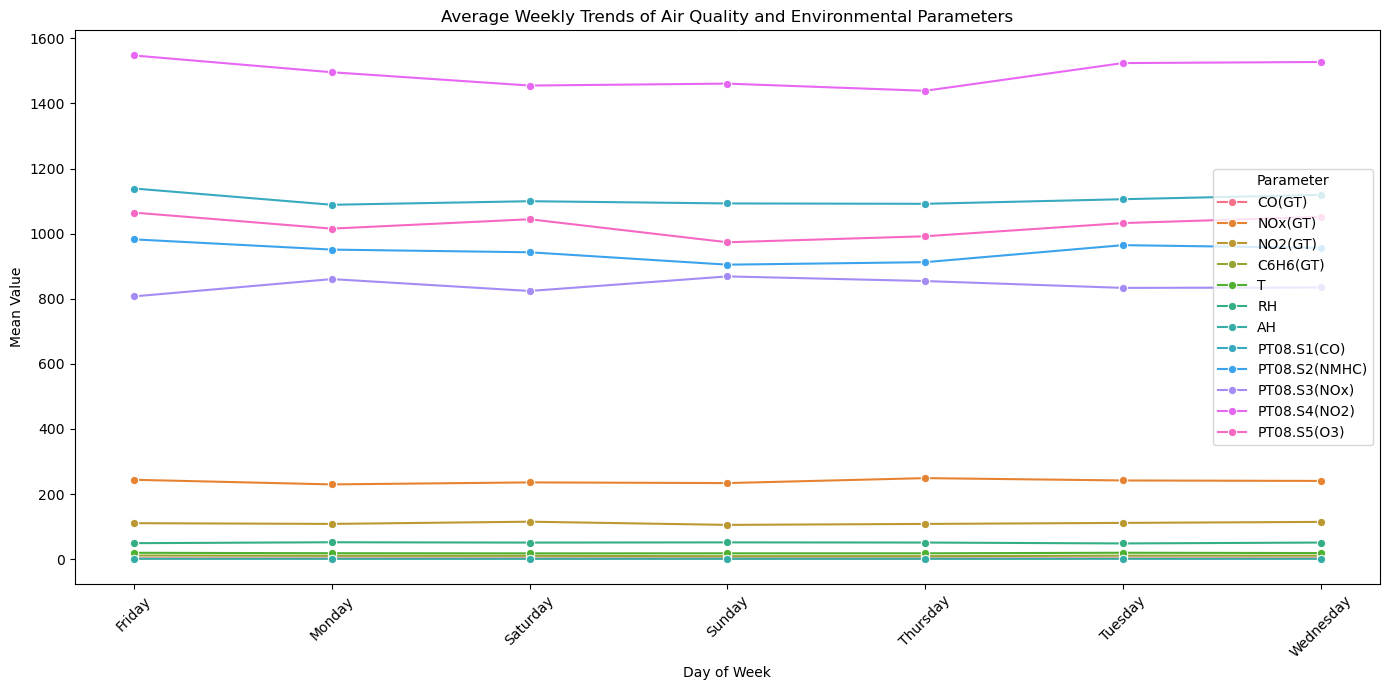

In [60]:
# Weekly Cyclic Trends
# Average per day of week across weeks

data['DayOfWeek'] = pd.to_datetime(data['Date'], errors='coerce').dt.day_name()

weekly_means = data.groupby('DayOfWeek')[cols_to_plot + sensor_cols].mean().reset_index()
weekly_means_melted = weekly_means.melt(id_vars='DayOfWeek', value_vars=cols_to_plot + sensor_cols, var_name='Parameter', value_name='Mean Value')

plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_means_melted, x='DayOfWeek', y='Mean Value', hue='Parameter', marker='o')
plt.title('Average Weekly Trends of Air Quality and Environmental Parameters')
plt.xlabel('Day of Week')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Parameter', loc='best')
plt.tight_layout()
plt.show()

### Correlation and Statistical Sig

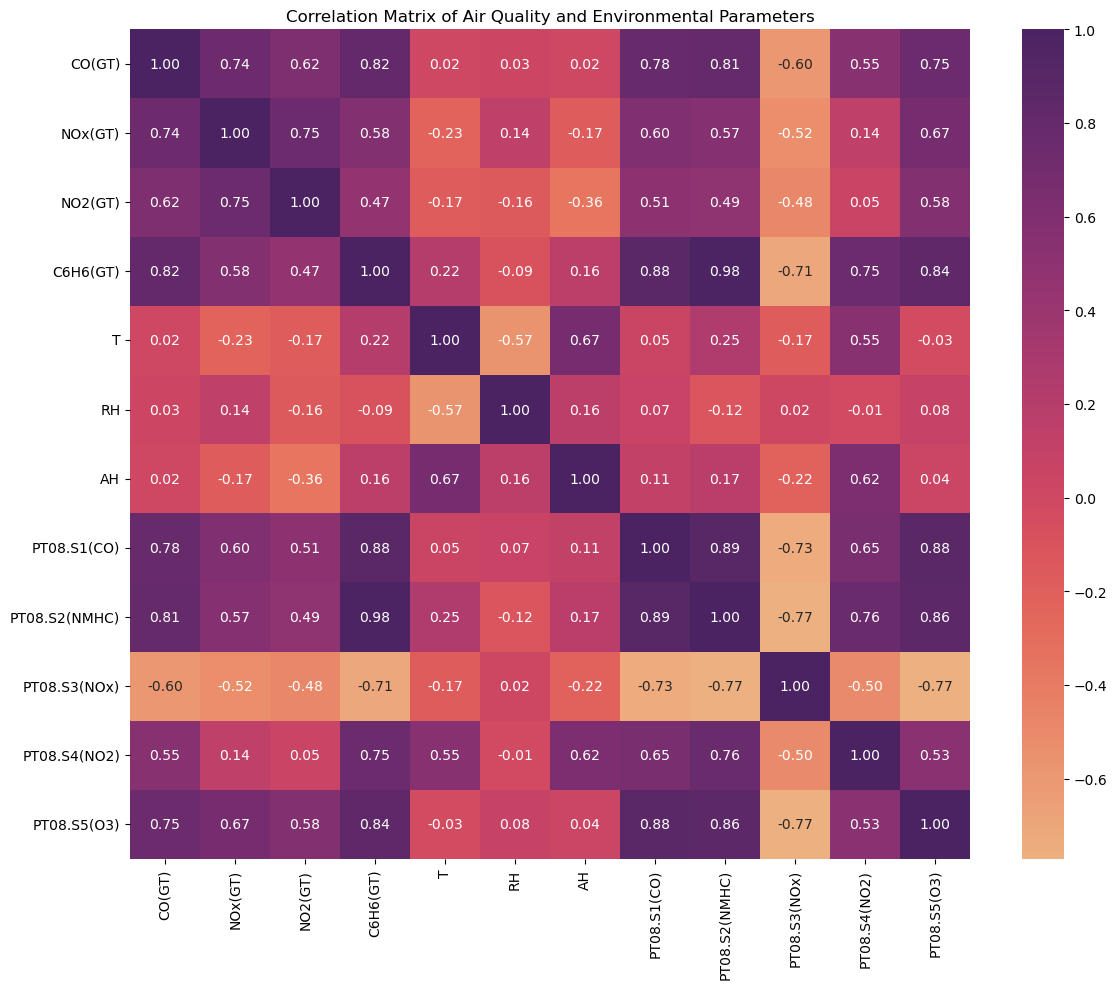

In [61]:
# Correlation Matrix
correlation_matrix = data[cols_to_plot + sensor_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='flare', cbar=True)
plt.title('Correlation Matrix of Air Quality and Environmental Parameters')
plt.tight_layout()
plt.show()

In [62]:
# p-values (to show statistical significance)
cols = cols_to_plot + sensor_cols
corr_matrix = pd.DataFrame(index=cols, columns=cols)
p_matrix = pd.DataFrame(index=cols, columns=cols)

for i in cols:
    for j in cols:
        corr, pval = pearsonr(data[i], data[j])
        corr_matrix.loc[i, j] = corr
        p_matrix.loc[i, j] = pval
p_matrix

,CO(GT),NOx(GT),NO2(GT),C6H6(GT),T,RH,AH,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3)
CO(GT),0.0,0.0,0.0,0.0,0.160867,0.018706,0.1429,0.0,0.0,0.0,0.0,0.0
NOx(GT),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NO2(GT),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0
C6H6(GT),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T,0.160867,0.0,0.0,0.0,0.0,0.0,0.0,0.000033,0.0,0.0,0.0,0.008028
RH,0.018706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044966,0.345814,0.0
AH,0.1429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000539
PT08.S1(CO),0.0,0.0,0.0,0.0,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PT08.S2(NMHC),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PT08.S3(NOx),0.0,0.0,0.0,0.0,0.0,0.044966,0.0,0.0,0.0,0.0,0.0,0.0
